# Support Vector Machine (HR/Employee Burnout Prediction)

## Explanation

### Objective

create a machine learning model that can predict whether an Employee/HR is experiencing Burnout or not, using the Support Vector Machine algorithm.

### Column Descriptions

- ***Name*** = Synthetic employee name (for realism, not for ML use).
- ***Age*** = Age of the employee.
- ***Gender*** = Male or Female.
- ***JobRole*** = Job type (Engineer, HR, Manager, etc.).
- ***Experience*** = Years of work experience.
- ***WorkHoursPerWeek*** = Average number of working hours per week.
- ***RemoteRatio*** = % of time spent working remotely (0–100).
- ***SatisfactionLevel*** = Self-reported satisfaction (1.0 to 5.0).
- ***StressLevel*** = Self-reported stress level (1 to 10).
- ***Burnout*** = Target variable. 1 if signs of burnout exist (high stress + low satisfaction + long hours), otherwise 0.

## A. Data Preparation

### A.1 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### A.2 Load Data

In [2]:
try:
    df = pd.read_csv('synthetic_employee_burnout.csv')
    print("Berhasil Membaca Data")
except Exception as e:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### A.3 Viewing Data Dimensions

In [3]:
df.shape

(2000, 10)

### A.4 Viewing Data Informations

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               2000 non-null   object 
 1   Age                2000 non-null   int64  
 2   Gender             2000 non-null   object 
 3   JobRole            2000 non-null   object 
 4   Experience         2000 non-null   int64  
 5   WorkHoursPerWeek   2000 non-null   int64  
 6   RemoteRatio        2000 non-null   int64  
 7   SatisfactionLevel  2000 non-null   float64
 8   StressLevel        2000 non-null   int64  
 9   Burnout            2000 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 156.4+ KB


### A.5 Viewing Data Statistics

In [5]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='flare')

,count,mean,std,min,25%,50%,75%,max
Age,2000.00,40.69,11.29,22.00,31.00,41.00,50.00,60.00
Experience,2000.00,10.07,9.15,0.00,3.00,7.00,15.00,39.00
WorkHoursPerWeek,2000.00,49.59,11.83,30.00,39.00,49.00,60.00,70.00
RemoteRatio,2000.00,49.97,29.15,0.00,24.00,49.00,75.00,100.00
SatisfactionLevel,2000.00,3.00,1.16,1.00,2.00,3.02,4.00,5.00
StressLevel,2000.00,5.43,2.88,1.00,3.00,5.00,8.00,10.00
Burnout,2000.00,0.06,0.25,0.00,0.00,0.00,0.00,1.00


### A.6 Viewing Top 5 Data and Bottom 5 Data

In [6]:
df.head()

,Name,Age,Gender,JobRole,Experience,WorkHoursPerWeek,RemoteRatio,SatisfactionLevel,StressLevel,Burnout
0,Max Ivanov,32,Male,Analyst,3,60,21,4.40,1,0
1,Max Wang,40,Female,Engineer,9,47,67,2.09,2,0
2,Nina Petrov,33,Female,Engineer,2,44,20,2.58,3,0
3,John Ivanov,35,Female,Manager,6,44,70,3.23,8,0
4,John Wang,59,Male,Sales,8,38,46,4.41,1,0


In [7]:
df.tail()

,Name,Age,Gender,JobRole,Experience,WorkHoursPerWeek,RemoteRatio,SatisfactionLevel,StressLevel,Burnout
1995,Leo Brown,41,Female,Manager,4,63,17,3.40,4,0
1996,Alex Brown,23,Female,HR,2,39,20,4.67,9,0
1997,Nina Wang,31,Female,HR,10,39,4,4.10,4,0
1998,Kate Lee,25,Male,HR,0,40,57,2.11,4,0
1999,Lily Petrov,49,Female,Engineer,13,65,22,4.36,8,0


### A.7 Viewing Duplicated Data

In [8]:
df.duplicated().sum()

np.int64(0)

### A.8 Viewing Missing Data

In [9]:
df.isna().sum()

Name                 0
Age                  0
Gender               0
JobRole              0
Experience           0
WorkHoursPerWeek     0
RemoteRatio          0
SatisfactionLevel    0
StressLevel          0
Burnout              0
dtype: int64

### A.9 Viewing Outlier Data

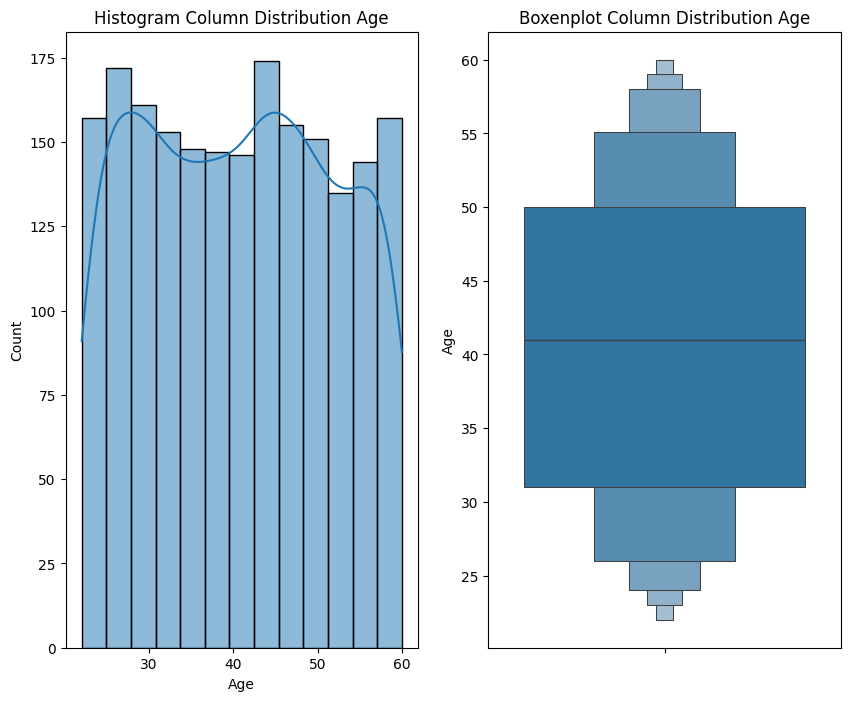

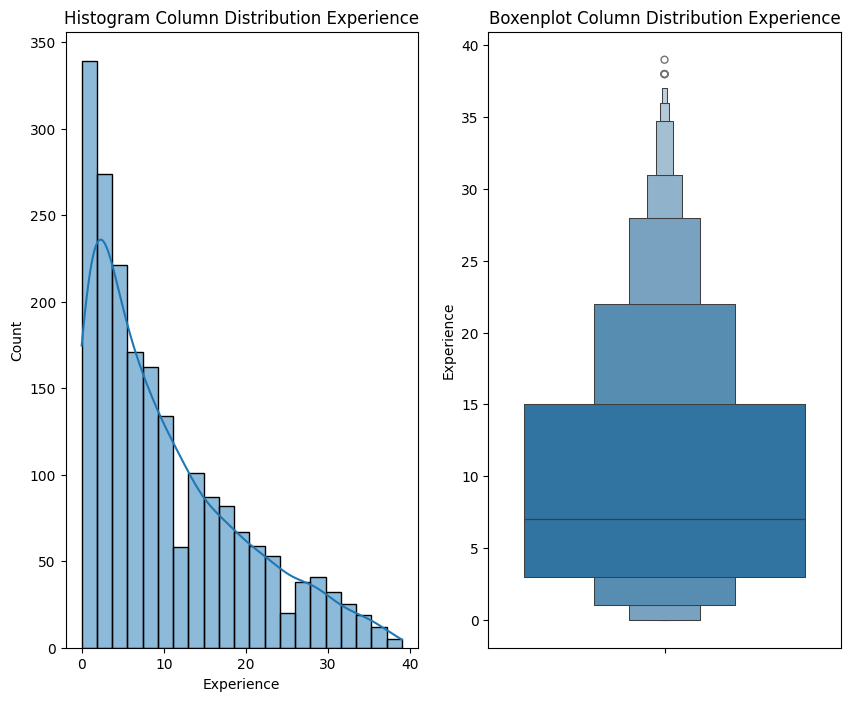

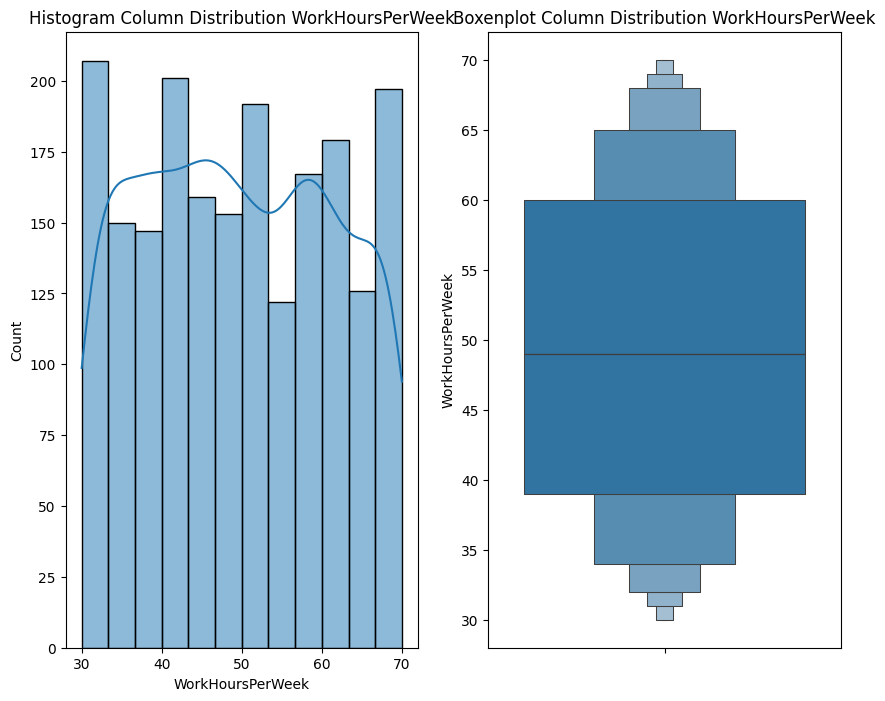

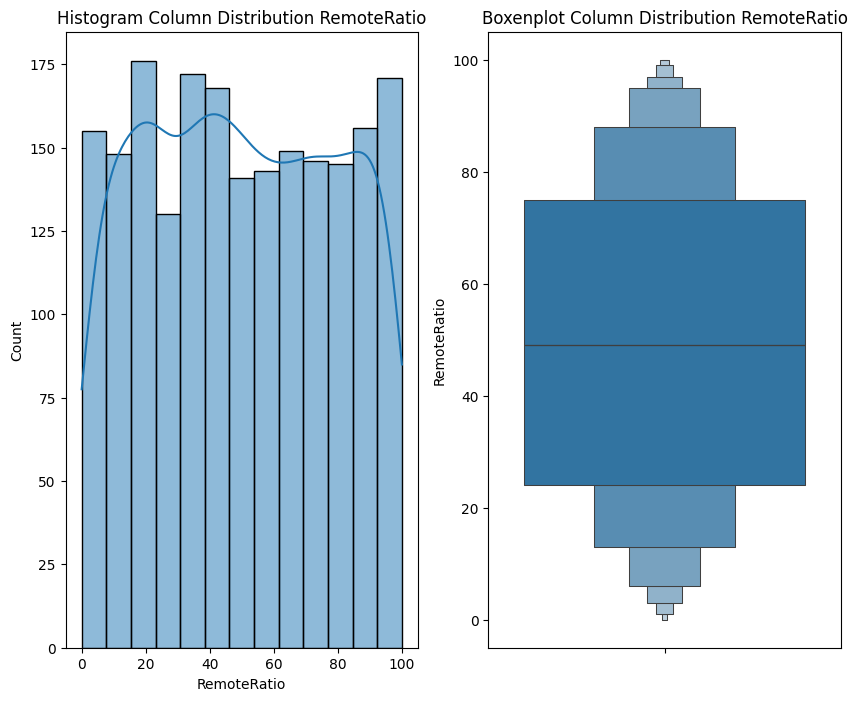

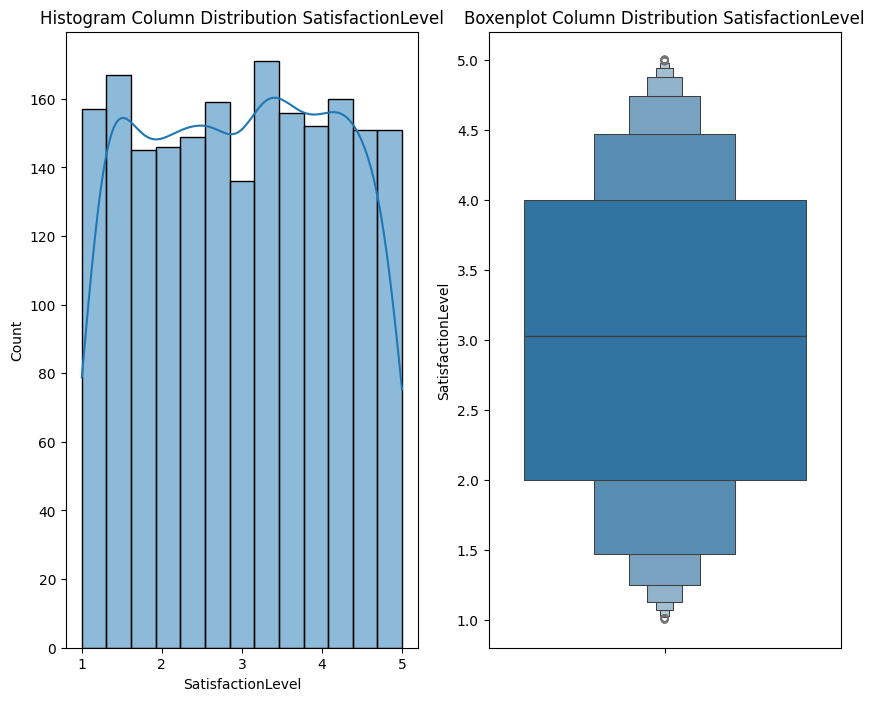

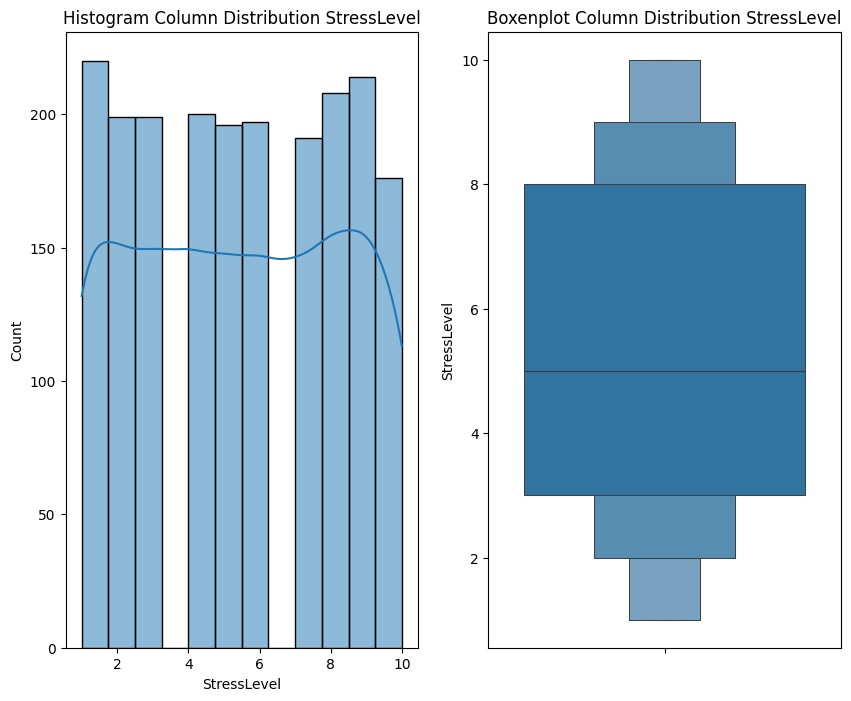

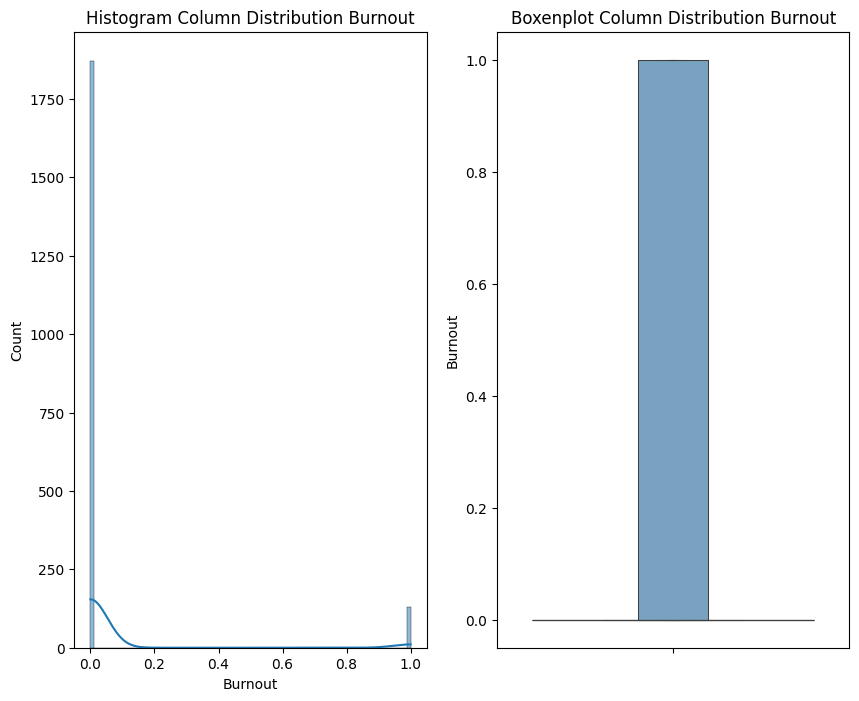

In [12]:
for col in df.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(10, 8))
    sns.histplot(df[col], kde=True, ax = axes[0])
    axes[0].set_title(f"Histogram Column Distribution {col}")
    sns.boxenplot(df[col], ax = axes[1])
    axes[1].set_title(f"Boxenplot Column Distribution {col}")

## B. Data Preprocessing

### B.1 Drop Unrelated Columns

In [16]:
df_clean = df.drop(columns='Name')
df_clean.columns

Index(['Age', 'Gender', 'JobRole', 'Experience', 'WorkHoursPerWeek',
       'RemoteRatio', 'SatisfactionLevel', 'StressLevel', 'Burnout'],
      dtype='object')

### B.2 Mapping Feature

In [17]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [20]:
gender_mapping = {'Female' : 0, 'Male' : 1}
df_clean['Gender'] = df['Gender'].map(gender_mapping)

In [21]:
df['JobRole'].unique()

array(['Analyst', 'Engineer', 'Manager', 'Sales', 'HR'], dtype=object)

In [22]:
jobrole_mapping = {'Analyst' : 0, 'Engineer' : 1, 'Manager' : 2, 'Sales' : 3, 'HR' : 4}
df_clean['JobRole'] = df['JobRole'].map(jobrole_mapping)

In [23]:
df_clean.head()

,Age,Gender,JobRole,Experience,WorkHoursPerWeek,RemoteRatio,SatisfactionLevel,StressLevel,Burnout
0,32,1,0,3,60,21,4.40,1,0
1,40,0,1,9,47,67,2.09,2,0
2,33,0,1,2,44,20,2.58,3,0
3,35,0,2,6,44,70,3.23,8,0
4,59,1,3,8,38,46,4.41,1,0


### B.3 Feature Engineering

#### Add New Columns

Stress Work Load

In [25]:
df_clean['StressWorkLoad'] = df_clean['StressLevel'] * df_clean['WorkHoursPerWeek']

In [29]:
df_clean.head()

,Age,Gender,JobRole,Experience,WorkHoursPerWeek,RemoteRatio,SatisfactionLevel,StressLevel,Burnout,Stress_Work_Load,StressWorkLoad,DespairIndex
0,32,1,0,3,60,21,4.40,1,0,60,60,0.237273
1,40,0,1,9,47,67,2.09,2,0,94,94,0.966938
2,33,0,1,2,44,20,2.58,3,0,132,132,1.172791
3,35,0,2,6,44,70,3.23,8,0,352,352,2.486780
4,59,1,3,8,38,46,4.41,1,0,38,38,0.236757


Despair Index

In [27]:
df_clean['DespairIndex'] = df_clean['StressLevel'] / df_clean['SatisfactionLevel'] + 0.01

In [28]:
df_clean.head()

,Age,Gender,JobRole,Experience,WorkHoursPerWeek,RemoteRatio,SatisfactionLevel,StressLevel,Burnout,Stress_Work_Load,StressWorkLoad,DespairIndex
0,32,1,0,3,60,21,4.40,1,0,60,60,0.237273
1,40,0,1,9,47,67,2.09,2,0,94,94,0.966938
2,33,0,1,2,44,20,2.58,3,0,132,132,1.172791
3,35,0,2,6,44,70,3.23,8,0,352,352,2.486780
4,59,1,3,8,38,46,4.41,1,0,38,38,0.236757


## C. Exploratory Data Analysis (EDA)

## D. Modelling

## E. Evaluation